In [1]:
# import the necessary packages
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

In [23]:
data_dir = r'C:\Users\Kian Hashtrudi\Downloads\SB_Code\datasets\animals'
image_size = 32
class_names = ['dogs', 'cats', 'panda']

In [24]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255)

In [25]:
data_gen = image_generator.flow_from_directory(
    directory = data_dir, 
    batch_size = 1000, 
    target_size = (image_size, image_size),
    classes = class_names)


Found 3000 images belonging to 3 classes.


In [26]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        plt.title(class_names[np.argmax(label_batch[n])])
        plt.axis('off')

In [27]:
image_batch, label_batch = next(data_gen)

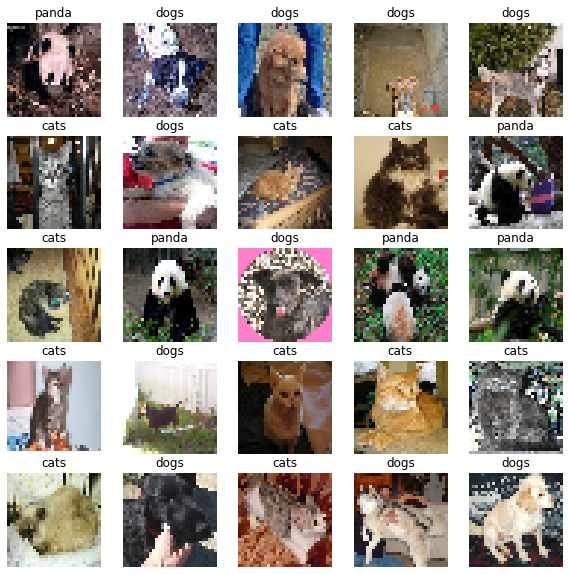

In [28]:
show_batch(image_batch, label_batch)

In [29]:
(trainX, testX, trainY, testY) = train_test_split(image_batch, label_batch, test_size=0.25, random_state=42)

In [30]:
trainX_flat = trainX.reshape((trainX.shape[0], 32*32*3)) 
testX_flat = testX.reshape((testX.shape[0], 32*32*3))

In [34]:
trainY_seq = np.argmax(trainY, axis=1)
testY_seq = np.argmax(testY, axis=1)

In [36]:
model = KNeighborsClassifier(n_neighbors=len(class_names))
model.fit(trainX_flat, trainY_seq)
print(classification_report(testY_seq, model.predict(testX_flat), target_names=class_names))

              precision    recall  f1-score   support

        dogs       0.35      0.55      0.42        87
        cats       0.48      0.57      0.52        84
       panda       1.00      0.13      0.22        79

    accuracy                           0.42       250
   macro avg       0.61      0.42      0.39       250
weighted avg       0.60      0.42      0.39       250

